## Visualize PAE plots for models generated by AlphaFold 3

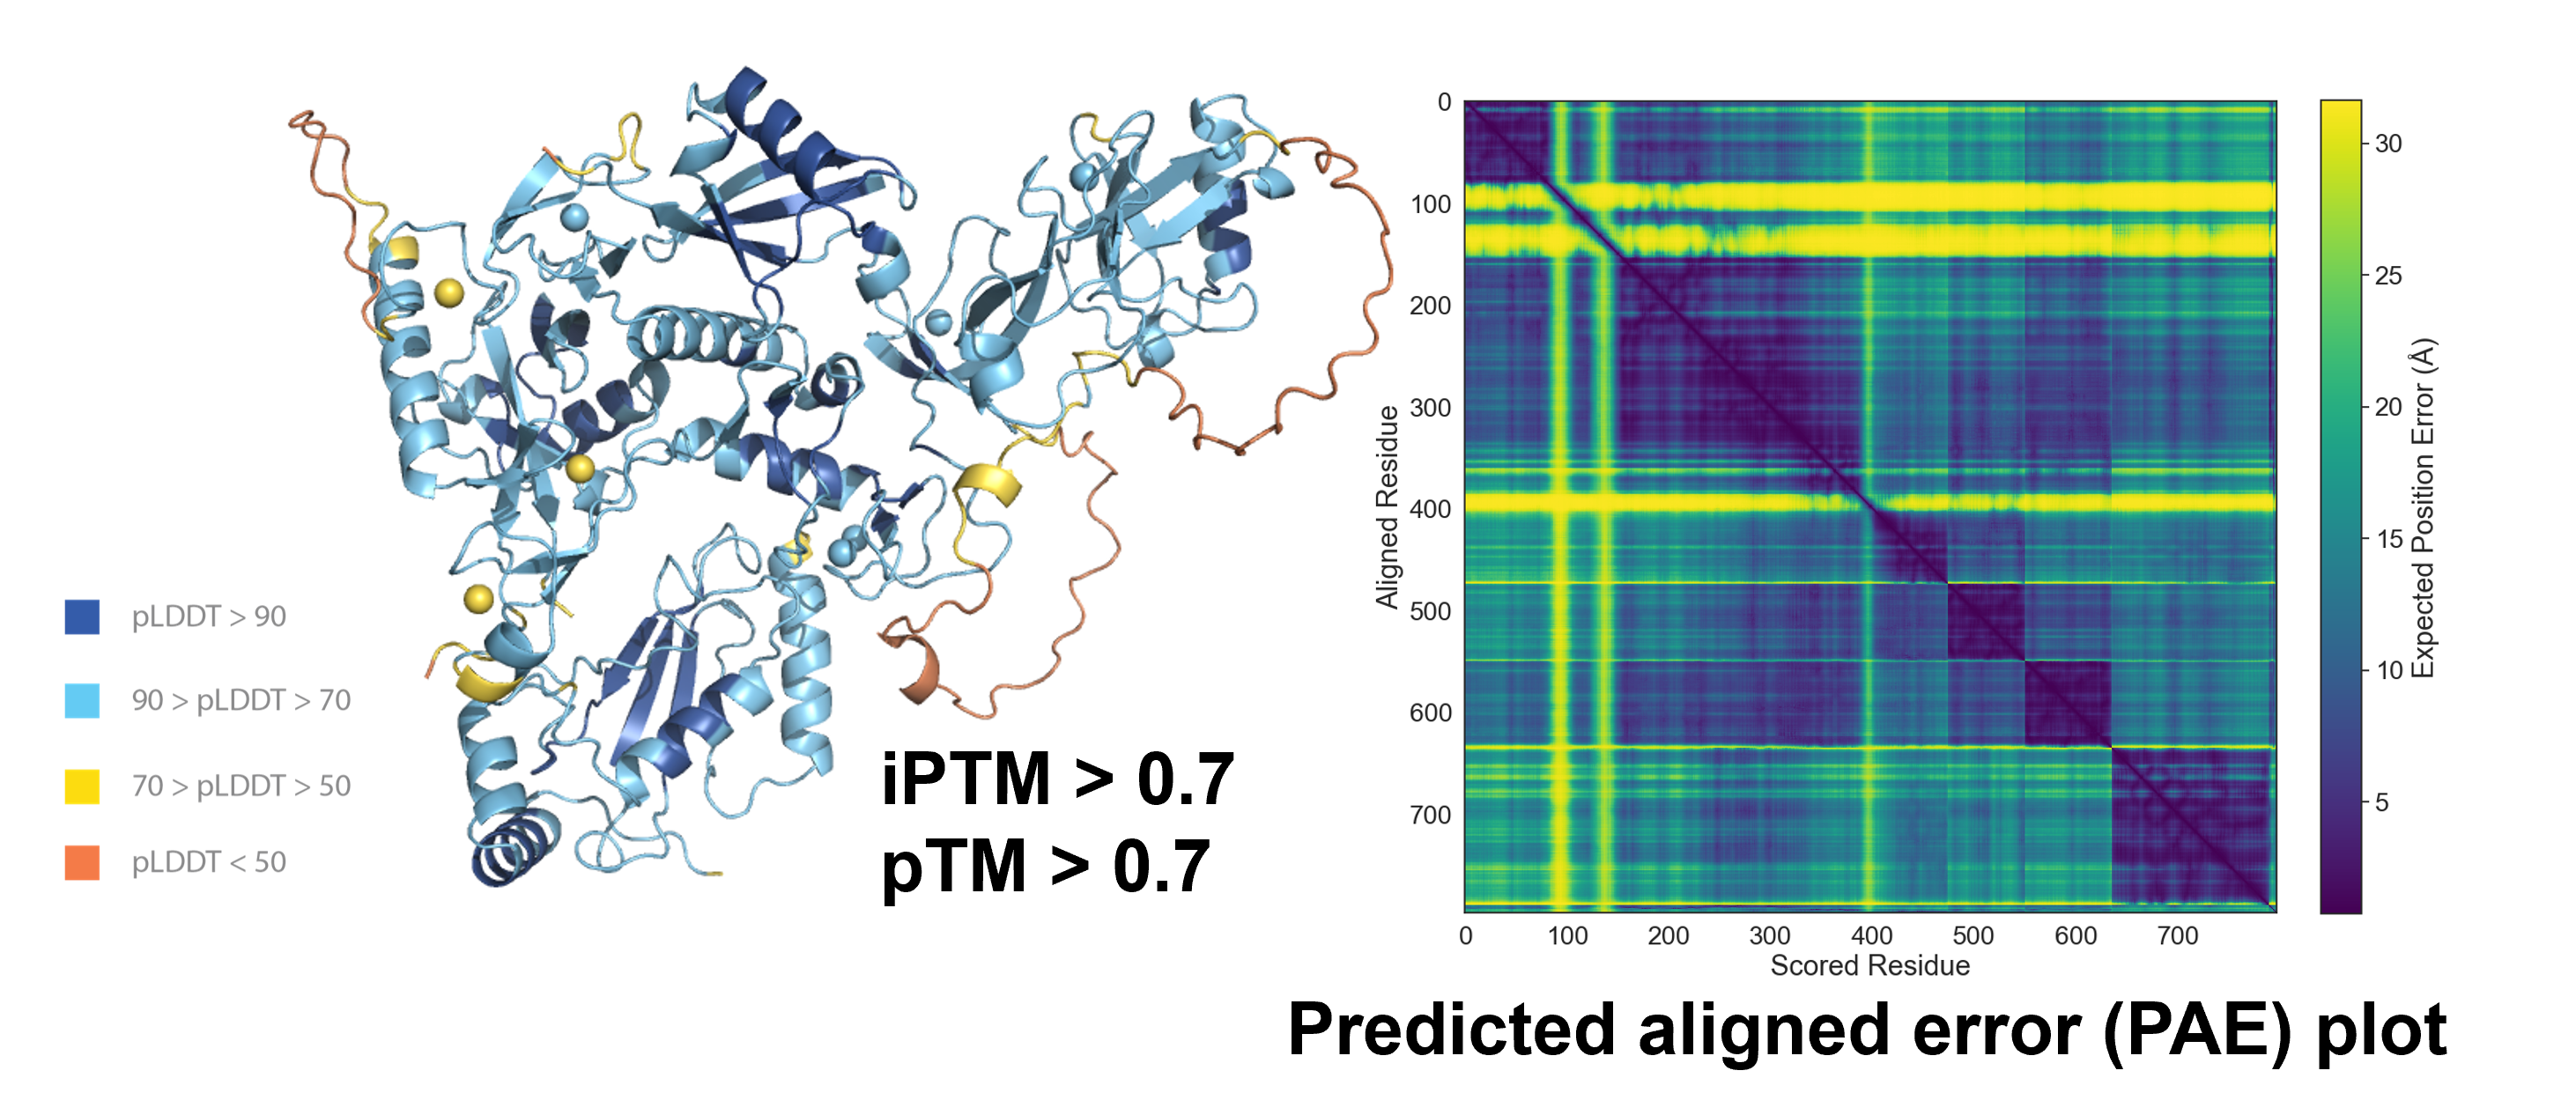
**Example of AlphaFold 3 outputs of the catalytical complex formed by activated parkin and E2~Ub** (adapted from Wagner JP et al., *Journal of Biological Chemistry*, 2025).

### **Background**
The AlphaFold 3 server produces five models with five corresponding PAE plots per query. The PAE plots are a measure for global confidence (confidence in the relative positions of two items within the predicted structure).  
They are stored as JSON files under the name: 'fold_<job_name>\_full_data\_\<N\>.json'. The structures are ranked from 0-4 (N = 0 - 4) based on the confidence: highest to lowest. 
### **How to use**:
You first need to unzip the folder you downloaded. Copy your folder path to the extracted folder containing the .JSON files and insert it at the appropriate place (```folder_path = r'your_path_here'```). The script will automatically detect files that contain the PAE matrix and plot them. You may want to rename very long job names before running.

You have a few costumization options:
- Change the figure size here: ```plt.figure(figsize=(width, height))```
- Change the coloring scheme here: ```plt.imshow(pae_matrix, cmap='your_coloring_scheme', interpolation='nearest')```. Colormap options are listed here: https://matplotlib.org/stable/gallery/color/colormap_reference.html. In the example PAE plot above, 'viridis' was used.
- Change the fontsize for the axis labels and the title using fontsize, e.g. ```fontsize=12```.
- The images are scores as .tif files with a resolution of 300dpi, but the resolution and file format can be changed, e.g. to PNG using ```plt.savefig(f'{output_name}.png', format='png', dpi=150, bbox_inches='tight')```.
- By default, adding `#` in front of a line will tell Python to not execute this line. Thus, if you do not want to display certain aspects, just add the hashtag in front of the line, e.g. ```#ax.set_title(f'Predicted Aligned Error (PAE) Plot for {output_name}', pad=15, fontsize=24)`` will not display the title.
### **Helpful resources**:
Link to the AlphaFold server: https://alphafoldserver.com/ with a short guide available here: https://alphafoldserver.com/guides

Very insightful training to better understand AlphaFold and its outputs by EMBL-EBI in collaboration with Google DeepMind: https://www.ebi.ac.uk/training/online/courses/alphafold/ 

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and process all PAE data from the .json files
folder_path = r'your_path_here'

# Identify files with .json extension in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)

        # Open and read the JSON files
        with open(file_path, 'r') as f:
            pae_data = json.load(f)
        
        # Step 2: Extract the PAE matrix from the loaded data - the key 'pae' contains the square matrix (size: number tokens x number tokens)
        if 'pae' in pae_data:
            pae_matrix = np.array(pae_data['pae'])

            # Create individual filenames for the title based on the input filename (for very long titles, you might want to rename them so that you get a nicer visual output)
            output_name = file_name.split("fold_")[1].split("_full")[0] + " " + file_name.split("data_")[1].split(".")[0]
            # Step 3: Plot the PAE matrix
            fig, ax = plt.subplots(figsize=(8, 8))
            img = ax.imshow(pae_matrix, cmap='Greens_r', interpolation='nearest') # Green_r is similar to AF server
            cbar = fig.colorbar(img, ax=ax, fraction=0.0453)
            cbar.set_label("Expected Position Error (Å)", fontsize=20)
            ax.set_title(f'Predicted Aligned Error (PAE) Plot for {output_name}', pad=15, fontsize=24)
            ax.set_xlabel('Scored Residue', fontsize=20)
            ax.set_ylabel('Aligned Residue', fontsize=20)
            plt.savefig(f'{output_name}.tif', format='tiff', dpi=300, bbox_inches='tight')